In [56]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
import pandas as pd
import numpy as np
from datetime import datetime
import time

import warnings
warnings.filterwarnings("ignore")

In [57]:
catalogs = []

def prepare_data(df, catal_name, col_names=None):
    
    cat = catal_name
    
    if col_names is None:
        return df
    else:
        df["DM_"+cat]   = df[col_names[0]]
        df["eDM_"+cat]  = df[col_names[1]]
        df['Vcmb_'+cat] = df[col_names[2]]z
       
    df["eDM_"+cat][df["DM_"+cat]==0] = np.nan
    df["DM_"+cat][df["DM_"+cat]==0] = np.nan
    df['PGC1_'+cat] = df.index
    df['PGC1_'+cat][df["DM_"+cat].isna()] = np.nan
    df['Vcmb_'+cat][df["DM_"+cat].isna()] = np.nan
    
    columns = ["DM", "eDM", "PGC1", "Vcmb"]
    
    if not catal_name in catalogs:
        catalogs.append(catal_name)
    
    return df[[col+'_'+cat for col in columns]]

In [58]:
data = pd.read_csv('./CF4_SNIa.Groups.csv', delimiter='|')
data = data.rename(columns=lambda x: x.strip())
data = data.set_index('PGC')

df = prepare_data(data, 'SNIa', ['DM', 'eDM', 'gVcmb'zz])

print(len(data))
df.head()

945


,DM_SNIa,eDM_SNIa,PGC1_SNIa,Vcmb_SNIa,gSGL_SNIa,gSGB_SNIa
PGC,,,,,,
250,35.050,0.130,250,6894,316.3212,17.6719
282,36.040,0.110,282,10921,282.0792,8.9703
415,35.130,0.140,415,7232,320.7141,18.0434
515,34.280,0.150,515,4896,301.6830,13.8441
616,36.045,0.115,616,11210,301.3086,14.0306


In [59]:
data = pd.read_csv('./CF4_FP_Groups.csv', delimiter='|')
data = data.rename(columns=lambda x: x.strip())
data = data.set_index('PGC')

data = prepare_data(data, 'FP', ['DM_w', 'eDM', 'gVcmb'])

print(len(data))

df = df.join(data, how='outer')

df.head()

27701


,DM_SNIa,eDM_SNIa,PGC1_SNIa,Vcmb_SNIa,gSGL_SNIa,gSGB_SNIa,DM_FP,eDM_FP,PGC1_FP,Vcmb_FP,gSGL_FP,gSGB_FP
PGC,,,,,,,,,,,,
75,NaN,NaN,NaN,NaN,NaN,NaN,36.334,0.345,75.0,11521.0,251.2392,-1.4353
115,NaN,NaN,NaN,NaN,NaN,NaN,36.200,0.590,115.0,14051.0,288.5214,11.5692
123,NaN,NaN,NaN,NaN,NaN,NaN,35.840,0.560,123.0,10964.0,278.4600,8.4002
211,NaN,NaN,NaN,NaN,NaN,NaN,36.048,0.243,211.0,10244.0,241.3354,-5.4383
250,35.05,0.13,250.0,6894.0,316.3212,17.6719,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2959,NaN,NaN,NaN,NaN,NaN,NaN,33.650,0.520,2959.0,4350.0,289.5374,-0.8542
2980,NaN,NaN,NaN,NaN,NaN,NaN,32.040,0.740,2980.0,1379.0,122.6505,-69.9321
3153,NaN,NaN,NaN,NaN,NaN,NaN,35.740,0.780,3153.0,10985.0,268.0550,-7.3017


In [60]:
data = pd.read_csv('./CF4_TFR_Groups.csv', delimiter='|')
data = data.rename(columns=lambda x: x.strip())
data = data.set_index('PGC')

data = prepare_data(data, 'TFR', ['DM_w', 'eDM', 'gVcmb'])

print(len(data))

df = df.join(data, how='outer')


df.head()

IndexError: list index out of range

In [6]:
data = pd.read_csv('./CF4_SBF_Groups.csv', delimiter='|')
data = data.rename(columns=lambda x: x.strip())
data = data.set_index('PGC')

data = prepare_data(data, 'SBFm', ['DMm_w', 'eDMm', 'gVcmb'])
data = data.dropna()
print(len(data))

df = df.join(data, how='outer')

df.head()

177


,DM_SNIa,eDM_SNIa,PGC1_SNIa,Vcmb_SNIa,DM_FP,eDM_FP,PGC1_FP,Vcmb_FP,DM_TFR,eDM_TFR,PGC1_TFR,Vcmb_TFR,DM_SBFm,eDM_SBFm,PGC1_SBFm,Vcmb_SBFm
PGC,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.97,0.41,12.0,6179.0,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.07,0.38,14.0,11474.0,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.63,0.45,16.0,5354.0,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.22,0.39,55.0,4466.0,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.22,0.41,63.0,8404.0,NaN,NaN,NaN,NaN


In [7]:
data = pd.read_csv('./CF4_SBF_Groups.csv', delimiter='|')
data = data.rename(columns=lambda x: x.strip())
data = data.set_index('PGC')

data = prepare_data(data, 'SBFir', ['DMir_w', 'eDMir', 'gVcmb'])
data = data.dropna()

print(len(data))

df = df.join(data, how='outer')

df.head()

57


,DM_SNIa,eDM_SNIa,PGC1_SNIa,Vcmb_SNIa,DM_FP,eDM_FP,PGC1_FP,Vcmb_FP,DM_TFR,eDM_TFR,PGC1_TFR,Vcmb_TFR,DM_SBFm,eDM_SBFm,PGC1_SBFm,Vcmb_SBFm,DM_SBFir,eDM_SBFir,PGC1_SBFir,Vcmb_SBFir
PGC,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.97,0.41,12.0,6179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.07,0.38,14.0,11474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.63,0.45,16.0,5354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.22,0.39,55.0,4466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.22,0.41,63.0,8404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# data = pd.read_csv('./CF4_SBF_Groups.csv', delimiter='|')
# data = data.rename(columns=lambda x: x.strip())
# data = data.set_index('PGC')

# data = prepare_data(data, 'SBFhc', ['DMhc_w', 'eDMhc', 'gVcmb'])
# data = data.dropna()

# print(data)
# print(len(data))

# df = df.join(data, how='outer')

# print(df.loc[data.index.values])

# df.head()

In [9]:
data = pd.read_csv('./CF4_SNII_Groups.csv', delimiter='|')
data = data.rename(columns=lambda x: x.strip())
data = data.set_index('PGC')

data = prepare_data(data, 'SNII', ['DM', 'eDM', 'Vcmb'])

print(len(data))

df = df.join(data, how='outer')

df.head()

94


,DM_SNIa,eDM_SNIa,PGC1_SNIa,Vcmb_SNIa,DM_FP,eDM_FP,PGC1_FP,Vcmb_FP,DM_TFR,eDM_TFR,...,PGC1_SBFm,Vcmb_SBFm,DM_SBFir,eDM_SBFir,PGC1_SBFir,Vcmb_SBFir,DM_SNII,eDM_SNII,PGC1_SNII,Vcmb_SNII
PGC,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.97,0.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.07,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.63,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.22,0.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.22,0.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
catalogs

['SNIa', 'FP', 'TFR', 'SBFm', 'SBFir', 'SNII']

In [11]:
ss = []
for cat in catalogs:
    ss += ['PGC1_'+cat, "DM_"+cat, "eDM_"+cat, "Vcmb_"+cat]

df = df[ss]

ss = []
for cat in catalogs:
    ss += ['PGC1_'+cat]   
df['pgc1'] = df[ss].median(axis=1)
df = df[~df['pgc1'].isna()]

print(len(df))

df.head()

37838


,PGC1_SNIa,DM_SNIa,eDM_SNIa,Vcmb_SNIa,PGC1_FP,DM_FP,eDM_FP,Vcmb_FP,PGC1_TFR,DM_TFR,...,Vcmb_SBFm,PGC1_SBFir,DM_SBFir,eDM_SBFir,Vcmb_SBFir,PGC1_SNII,DM_SNII,eDM_SNII,Vcmb_SNII,pgc1
PGC,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,34.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,36.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,34.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,34.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,35.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [12]:
ss = []
for cat in catalogs:
    ss += ['PGC1_'+cat]   
df['pgc1'] = df[ss].median(axis=1)
df = df[~df['pgc1'].isna()]



d = np.zeros(len(catalogs))
myDict = {}
for i, cat in enumerate(catalogs):
    myDict[cat] = d[i]

for cat in catalogs:
    df['w_'+cat] = 1./df['eDM_'+cat]**2
    df['xw_'+cat] = (df['DM_'+cat]+myDict[cat])*df['w_'+cat]

  
dg = df.groupby("pgc1").agg(["sum", "count"])

for cat in catalogs:
    dg['eDMg_'+cat] = np.sqrt(1./dg['w_'+cat]['sum'])
    dg['DMg_'+cat] = (dg['xw_'+cat]['sum'])/dg['w_'+cat]['sum']

ss = []
for cat in catalogs:
    dg['N_'+cat] = dg["DM_"+cat]['count']
    ss += ['N_'+cat, "DMg_"+cat, "eDMg_"+cat]

dg = dg[ss]
dg.replace([np.inf, -np.inf], np.nan, inplace=True)

dg.index = dg.index.astype('int')


ss = ['DMg_'+cat for cat in catalogs]+['eDMg_'+cat for cat in catalogs]
dg_ = dg[ss]

for cat in catalogs:
        dg_['gw_'+cat] = 1./dg_['eDMg_'+cat]**2

In [13]:
# dg = df.groupby("pgc1").agg(["sum", "count"])
dg

,N_SNIa,DMg_SNIa,eDMg_SNIa,N_FP,DMg_FP,eDMg_FP,N_TFR,DMg_TFR,eDMg_TFR,N_SBFm,DMg_SBFm,eDMg_SBFm,N_SBFir,DMg_SBFir,eDMg_SBFir,N_SNII,DMg_SNII,eDMg_SNII
,,,,,,,,,,,,,,,,,,
pgc1,,,,,,,,,,,,,,,,,,
12,0,NaN,NaN,0,NaN,NaN,1,34.97,0.41,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
14,0,NaN,NaN,0,NaN,NaN,1,36.07,0.38,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
16,0,NaN,NaN,0,NaN,NaN,1,34.63,0.45,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
55,0,NaN,NaN,0,NaN,NaN,1,34.22,0.39,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
63,0,NaN,NaN,0,NaN,NaN,1,35.22,0.41,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003280,1,38.00,0.1,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
9003281,1,37.63,0.1,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN


In [14]:
for col in catalogs[1:]:
    df0 = dg[["DMg_SNIa", "DMg_"+col]].dropna()

    delta = df0.DMg_SNIa - df0["DMg_"+col]

    print(col, np.median(delta))

FP 0.23100000000000165
TFR 0.14999999999999858
SBFm 0.045000000000001705
SBFir 0.10499999999999687
SNII 0.059999999999996945


In [15]:
def GfastChi2(dg, theta=None):
    
    if theta is None:
        d = np.zeros(len(catalogs))
    else:
        theta = np.asarray(theta)
        d = np.concatenate((np.zeros(1), theta[1:]))
    
    myDict = {}
    for i, cat in enumerate(catalogs):
        myDict[cat] = d[i]

    ###########################################################
        
    for cat in catalogs:
#         dg['gw_'+cat] = 1./dg['eDMg_'+cat]**2
        dg['gxw_'+cat] = (dg['DMg_'+cat]+myDict[cat])*dg['gw_'+cat]


    sx = ['gxw_'+cat for cat in catalogs]
    sw = ['gw_'+cat for cat in catalogs]
    
    ERRave2 = 1./dg[sw].sum(axis=1)
    ave = dg[sx].sum(axis=1)*ERRave2
    
    myDict[catalogs[0]] = theta[0]
    for cat in catalogs:
        dg['gxi2_'+cat] = ((dg['DMg_'+cat]+myDict[cat]-ave)**2)/(dg_['eDMg_'+cat]**2+ERRave2)


    sxi = ['gxi2_'+cat for cat in catalogs]    
    XI2 = dg[sxi].sum(axis=1)

    return XI2.sum()

In [16]:
t1 =  datetime.now()

print(GfastChi2(dg_, theta=range(len(catalogs))))

###########################################
t2 =  datetime.now()
print("Execution time:")
print(t2-t1)

38937.628197886894
Execution time:
0:00:00.079770


In [17]:
dg.head()

,N_SNIa,DMg_SNIa,eDMg_SNIa,N_FP,DMg_FP,eDMg_FP,N_TFR,DMg_TFR,eDMg_TFR,N_SBFm,DMg_SBFm,eDMg_SBFm,N_SBFir,DMg_SBFir,eDMg_SBFir,N_SNII,DMg_SNII,eDMg_SNII
,,,,,,,,,,,,,,,,,,
pgc1,,,,,,,,,,,,,,,,,,
12,0,NaN,NaN,0,NaN,NaN,1,34.97,0.41,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
14,0,NaN,NaN,0,NaN,NaN,1,36.07,0.38,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
16,0,NaN,NaN,0,NaN,NaN,1,34.63,0.45,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
55,0,NaN,NaN,0,NaN,NaN,1,34.22,0.39,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN
63,0,NaN,NaN,0,NaN,NaN,1,35.22,0.41,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN


In [18]:
df

,PGC1_SNIa,DM_SNIa,eDM_SNIa,Vcmb_SNIa,PGC1_FP,DM_FP,eDM_FP,Vcmb_FP,PGC1_TFR,DM_TFR,...,w_FP,xw_FP,w_TFR,xw_TFR,w_SBFm,xw_SBFm,w_SBFir,xw_SBFir,w_SNII,xw_SNII
PGC,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,34.97,...,NaN,NaN,5.948840,208.030934,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,36.07,...,NaN,NaN,6.925208,249.792244,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,34.63,...,NaN,NaN,4.938272,171.012346,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,34.22,...,NaN,NaN,6.574622,224.983563,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,35.22,...,NaN,NaN,5.948840,209.518144,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003280,9003280.0,38.00,0.1,26487.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9003281,9003281.0,37.63,0.1,21964.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9003283,9003283.0,35.05,0.1,7034.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
len(dg_)

37838

In [20]:
dg_.head()

,DMg_SNIa,DMg_FP,DMg_TFR,DMg_SBFm,DMg_SBFir,DMg_SNII,eDMg_SNIa,eDMg_FP,eDMg_TFR,eDMg_SBFm,...,gxw_TFR,gxw_SBFm,gxw_SBFir,gxw_SNII,gxi2_SNIa,gxi2_FP,gxi2_TFR,gxi2_SBFm,gxi2_SBFir,gxi2_SNII
,,,,,,,,,,,...,,,,,,,,,,
pgc1,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,34.97,NaN,NaN,NaN,NaN,NaN,0.41,NaN,...,219.928614,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
14,NaN,NaN,36.07,NaN,NaN,NaN,NaN,NaN,0.38,NaN,...,263.642659,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
16,NaN,NaN,34.63,NaN,NaN,NaN,NaN,NaN,0.45,NaN,...,180.888889,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
55,NaN,NaN,34.22,NaN,NaN,NaN,NaN,NaN,0.39,NaN,...,238.132807,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
63,NaN,NaN,35.22,NaN,NaN,NaN,NaN,NaN,0.41,NaN,...,221.415824,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [21]:
def lnlike(theta):
    
    xi2 = GfastChi2(dg_, theta=theta)
    
    return -0.5*xi2


def lnprior(theta):
    
    return 0.0


def lnprob(theta):
    
    lp = lnprior(theta)
    if not np.isfinite(lp) :
        return -np.inf    
    return lp + lnlike(theta)

In [22]:
t1 =  datetime.now()
###########################################

ndim, nwalkers = len(catalogs), 128 # 128

p0 = [np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

sampler.reset()
sampler.run_mcmc(p0, 5000) # 5000 for hours
samples = sampler.chain[:, 1000:, :].reshape((-1, ndim))

theta = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                            zip(*np.percentile(samples, 
                            [16, 50, 84],
                            axis=0)))



Execution time:
5:15:59.828952


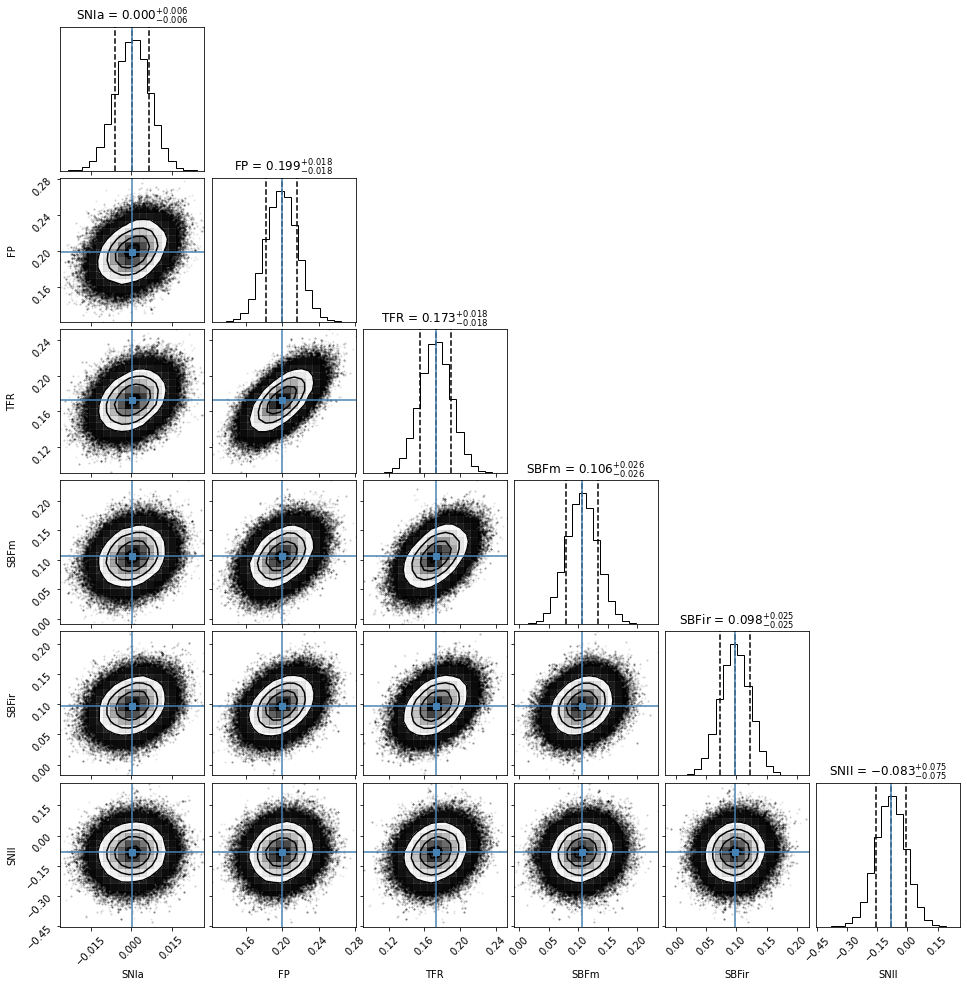

In [23]:
truths=[t[0] for t in theta]
fig = corner.corner(samples, labels=catalogs, 
                    truths=truths, 
                    quantiles=[0.16, 0.5, 0.84], 
                    show_titles=True, 
                    title_kwargs={"fontsize": 12}, 
                    title_fmt=".3f")

###########################################
t2 =  datetime.now()
print("Execution time:")
print(t2-t1)

In [24]:
npzName = "ALL_groups_wo_hc.npz"
np.savez(npzName, samples)
npzfile = np.load(npzName)
print("npz attributes: ", npzfile.files)
NPZsamples = npzfile['arr_0']

npz attributes:  ['arr_0']


In [25]:
mean = np.mean(NPZsamples[:,0])

mean

0.00035704758098698816

In [26]:
NPZsamples[:,0] -= mean

In [27]:
theta = map(lambda v: [v[1], v[2]-v[1], v[1]-v[0]],
                            zip(*np.percentile(NPZsamples, 
                            [16, 50, 84],
                            axis=0)))



theta

In [37]:
labs  = ['SNIa', 'FP', 'TFR', 'SBF_{main}', 'SBF_{ir}', 'SNII']

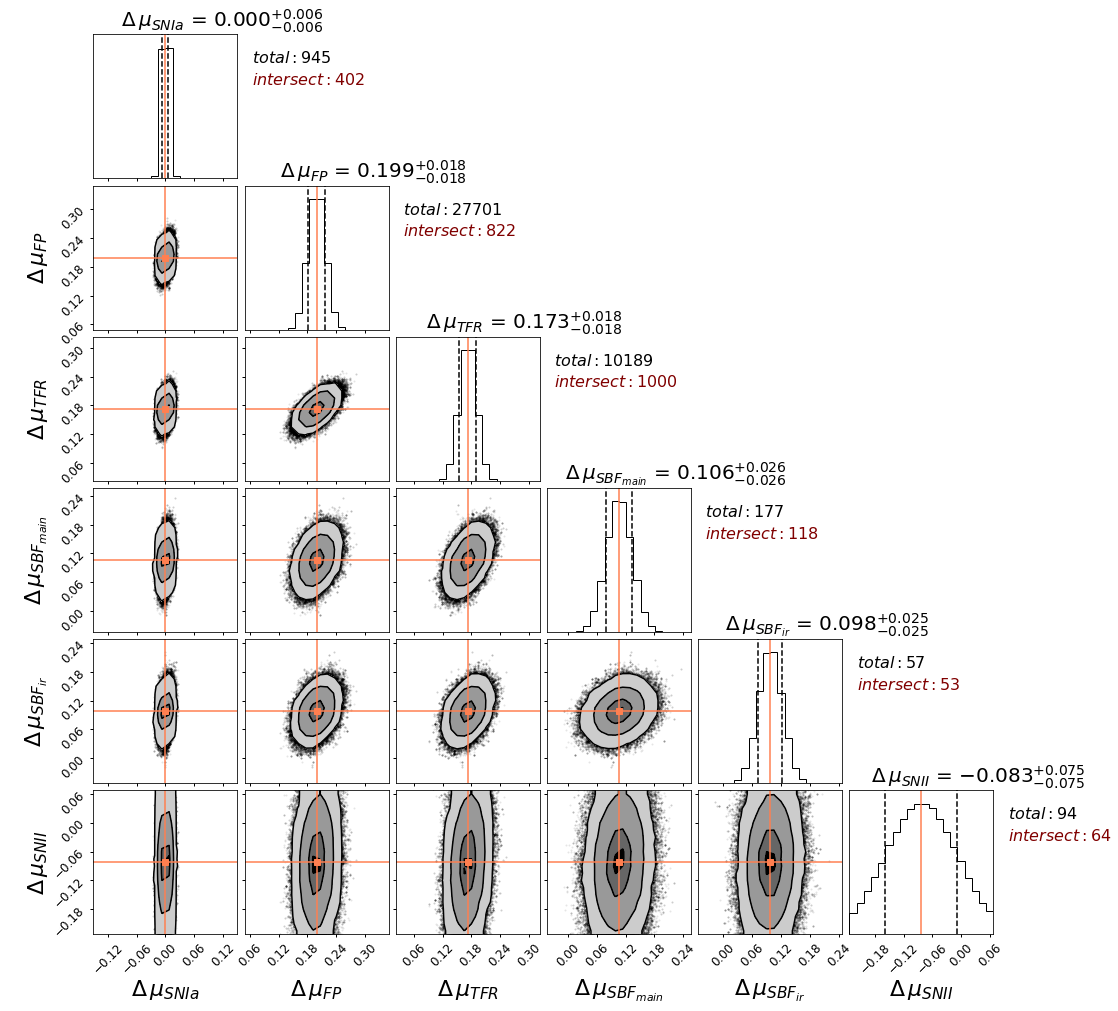

In [39]:
theta = map(lambda v: [v[1], v[2]-v[1], v[1]-v[0]],
                            zip(*np.percentile(NPZsamples, 
                            [16, 50, 84],
                            axis=0)))

truths=[t[0] for t in theta]
truths[0] = 0

labels = ['                  '+r'$\Delta\/ \mu_{'+cat+'}$' for cat in labs] 

fig = corner.corner(NPZsamples, labels=labels, 
                    truths=truths, truth_color='coral',
                    levels=(1-np.exp(-1./8),1-np.exp(-0.5),1-np.exp(-0.5*4),1-np.exp(-0.5*9)),
                    show_titles=True, fill_contours=True, plot_density=True,
                    quantiles=[0.16, 0.84], 
                    scale_hist=False,space=0, 
                    title_kwargs={"fontsize": 20}, 
                    title_fmt=".3f",
                    range=[(t-0.15,t+0.15) for t in truths]
                   )

m = 0 
n_cat = len(catalogs)
i_cat = 0
for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=12)
    
    lbl = ax.xaxis.get_label()
    lbl.set_fontsize(22)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)
    lbl.set_linespacing(50)
    lbl = ax.yaxis.get_label()
    lbl.set_fontsize(22)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)    
    
    
    ax.tick_params(which='major', length=3, width=1., direction='out')
    
    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = -0.1*Xlm[0]+1.1*Xlm[1]
    
    if m%(n_cat+1)==0:
        y0 = 0.2*Ylm[0]+0.80*Ylm[1]
        dx = df[['DM_'+catalogs[i_cat]]].dropna()
        ax.text(x0,y0, r"$total: $"+str(len(dx)), fontsize=16, color='k')
        
        y0 = 0.35*Ylm[0]+0.65*Ylm[1]
        other_DMs = ["DM_"+c for c in catalogs if c != catalogs[i_cat]]
        
        df["sumDM"] = df[other_DMs].sum(axis=1)
        df["sumDM"][df["sumDM"]==0] = np.nan
        
        dx = df[['sumDM', 'DM_'+catalogs[i_cat]]].dropna()
        ax.text(x0,y0, r"$intersect: $"+str(len(dx)), fontsize=16, color='maroon')
        i_cat += 1


    m+=1

